In [3]:
import pymc as pm
import matplotlib.pyplot as plt

N = 100
X = 35
p = pm.Uniform("freq_cheating", 0, 1)
p_yes = 0.5 * p + 0.25
yes_responses = pm.Binomial("number_cheaters", n=N, p=p_yes, value=X, observed=True)

mcmc = pm.MCMC([p, p_yes, yes_responses])
mcmc.sample(25000, 2500)

 [-----------------100%-----------------] 25000 of 25000 complete in 0.9 sec

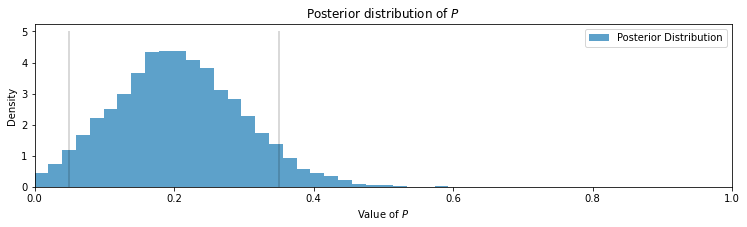

In [5]:
plt.figure(figsize=(12.5, 3))
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", density=True, alpha=0.8, bins=30, 
         label="Posterior Distribution", color="#348ABD")
plt.vlines([0.05, X / N], [0, 0], [5, 5], alpha=0.2)
plt.xlim(0, 1)
plt.xlabel("Value of $P$")
plt.ylabel("Density")
plt.title("Posterior distribution of $P$")
plt.legend()